In [2]:
import numpy as np
import pandas as pd


Bu Hafta 6 dersinin notebooku

In [3]:
import torch
import torchvision
import torchvision.transforms as transforms
torch.manual_seed(42)

/shared-libs/python3.9/py/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Veri okuma kısmı (hazır)

https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

Most parts of this cell are from the above link, modified to extract only a smaller subset of the dataset so that the notebook could run on CPU for the duration of the class quickly enough...

In [4]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])


# Load the CIFAR10 training set
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

# Reduce the size of the training set
train_size = 1000
trainset.data = trainset.data[:train_size]
trainset.targets = trainset.targets[:train_size]

# Calculate the size of the validation set as a percentage of the training set
val_size = int(0.2 * len(trainset))

# Split the training set into a new training set and a validation set

trainset, valset = torch.utils.data.random_split(trainset, [len(trainset) - val_size, val_size])

batch_size = 4 # ne kadar büyük o kadar iyi

# Create the data loaders for the new training set, validation set, and test set
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)
valloader = torch.utils.data.DataLoader(valset, batch_size=batch_size,
                                        shuffle=False, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


Verilerin bir kısmını görselleyelim (hazır)

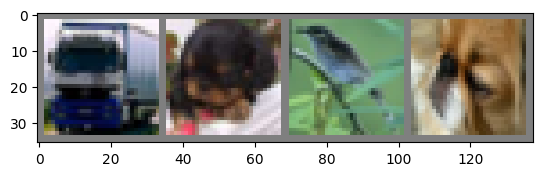

truck dog   bird  dog  


In [5]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [ ]:
images

tensor([[[[ 1.0000,  1.0000,  1.0000,  ...,  0.9843,  0.9922,  1.0000],
          [ 1.0000,  0.9922,  0.9843,  ...,  0.9529,  0.9686,  0.9843],
          [ 1.0000,  0.9843,  0.9765,  ...,  0.9529,  0.9686,  0.9843],
          ...,
          [-0.1608, -0.0667, -0.1059,  ..., -0.8824, -0.7176, -0.6471],
          [ 0.1059,  0.1608,  0.1843,  ..., -0.9294, -0.7412, -0.6471],
          [ 0.3647,  0.4745,  0.5373,  ..., -0.9373, -0.7020, -0.3647]],

         [[ 0.9451,  0.9294,  0.9294,  ...,  0.9294,  0.9216,  0.9216],
          [ 0.9294,  0.9137,  0.9059,  ...,  0.8902,  0.8980,  0.9059],
          [ 0.9216,  0.9137,  0.9137,  ...,  0.9059,  0.9137,  0.9137],
          ...,
          [-0.1137, -0.0431, -0.0667,  ..., -0.7804, -0.6078, -0.5529],
          [ 0.1059,  0.0824,  0.1216,  ..., -0.7020, -0.5451, -0.5216],
          [ 0.2392,  0.2784,  0.3490,  ..., -0.7412, -0.5216, -0.2784]],

         [[ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  0.9922],
          [ 1.0000,  0.9843,  

In [ ]:
labels

tensor([9, 5, 2, 5])

In [ ]:
len(classes)

10

# Bizim kodlarımız (our NN code)

ChatGPT: tek hidden layerlı bir multilayer perceptron oluştur, hidden layer'da tanh, output layerda softmax olsun

In [ ]:
"""import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(3*32*32, 10)

    def forward(self, x):
        x = x.view(-1, 3*32*32)
        x = self.fc1(x)
        return x"""

'import torch.nn as nn\nimport torch.nn.functional as F\n\nclass Net(nn.Module):\n    def __init__(self):\n        super(Net, self).__init__()\n        self.fc1 = nn.Linear(3*32*32, 10)\n\n    def forward(self, x):\n        x = x.view(-1, 3*32*32)\n        x = self.fc1(x)\n        return x'

Pytorch kullanmadan kod yazılabilir: ChatGPT sonucu:

In [ ]:
#author of this cell: Ömer Faruk Akyapak & ChatGPT
"""import numpy as np

class MLP:
    def __init__(self, input_size, hidden_size, output_size):
        self.W1 = np.random.randn(input_size, hidden_size) / np.sqrt(input_size)
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) / np.sqrt(hidden_size)
        self.b2 = np.zeros((1, output_size))

    def tanh(self, x):
        return np.tanh(x)

    def softmax(self, x):
        exp_scores = np.exp(x)
        return exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.tanh(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.probs = self.softmax(self.z2)
        return self.probs

    def predict(self, X):
        probs = self.forward(X)
        return np.argmax(probs, axis=1)

    def calculate_loss(self, X, y):
        num_examples = len(X)
        probs = self.forward(X)
        correct_logprobs = -np.log(probs[range(num_examples), y])
        data_loss = np.sum(correct_logprobs)
        return 1./num_examples * data_loss

    def train(self, X, y, num_epochs, learning_rate=0.01):
        num_examples = len(X)
        for epoch in range(num_epochs):
            # forward propagation
            self.forward(X)

            # backward propagation
            delta3 = self.probs
            delta3[range(num_examples), y] -= 1
            dW2 = (self.a1.T).dot(delta3)
            db2 = np.sum(delta3, axis=0, keepdims=True)
            delta2 = delta3.dot(self.W2.T) * (1 - np.power(self.a1, 2))
            dW1 = np.dot(X.T, delta2)
            db1 = np.sum(delta2, axis=0)

            # parameter update
            self.W1 -= learning_rate * dW1
            self.b1 -= learning_rate * db1
            self.W2 -= learning_rate * dW2
            self.b2 -= learning_rate * db2

            # print loss after every 1000 epochs
            if epoch % 1000 == 0:
                print("Epoch {0}: Loss = {1}".format(epoch, self.calculate_loss(X, y)))
"""

'import numpy as np\n\nclass MLP:\n    def __init__(self, input_size, hidden_size, output_size):\n        self.W1 = np.random.randn(input_size, hidden_size) / np.sqrt(input_size)\n        self.b1 = np.zeros((1, hidden_size))\n        self.W2 = np.random.randn(hidden_size, output_size) / np.sqrt(hidden_size)\n        self.b2 = np.zeros((1, output_size))\n\n    def tanh(self, x):\n        return np.tanh(x)\n\n    def softmax(self, x):\n        exp_scores = np.exp(x)\n        return exp_scores / np.sum(exp_scores, axis=1, keepdims=True)\n\n    def forward(self, X):\n        self.z1 = np.dot(X, self.W1) + self.b1\n        self.a1 = self.tanh(self.z1)\n        self.z2 = np.dot(self.a1, self.W2) + self.b2\n        self.probs = self.softmax(self.z2)\n        return self.probs\n\n    def predict(self, X):\n        probs = self.forward(X)\n        return np.argmax(probs, axis=1)\n\n    def calculate_loss(self, X, y):\n        num_examples = len(X)\n        probs = self.forward(X)\n        corre

In [ ]:
"""#Bu örnekte, girdi boyutu 10, gizli katman boyutu 5 ve çıktı boyutu 3 olsun.
#author of this cell: ilkay  biçici & ChatGPT
import torch
import torch.nn as nn

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.hidden_layer = nn.Linear(10, 5)
        self.output_layer = nn.Linear(5, 3)
        self.activation = nn.Tanh()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.activation(self.hidden_layer(x))
        x = self.softmax(self.output_layer(x))
        return x

# Modeli oluştur
model = MLP()
"""

'#Bu örnekte, girdi boyutu 10, gizli katman boyutu 5 ve çıktı boyutu 3 olsun.\n#author of this cell: ilkay  biçici & ChatGPT\nimport torch\nimport torch.nn as nn\n\nclass MLP(nn.Module):\n    def __init__(self):\n        super(MLP, self).__init__()\n        self.hidden_layer = nn.Linear(10, 5)\n        self.output_layer = nn.Linear(5, 3)\n        self.activation = nn.Tanh()\n        self.softmax = nn.Softmax(dim=1)\n\n    def forward(self, x):\n        x = self.activation(self.hidden_layer(x))\n        x = self.softmax(self.output_layer(x))\n        return x\n\n# Modeli oluştur\nmodel = MLP()\n'

In [ ]:
#Author of this cell: Ebu Belk % ChatGPT
"""import torch.nn as nn

class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.hidden_layer = nn.Linear(input_size, hidden_size)
        self.output_layer = nn.Linear(hidden_size, output_size)
        self.activation = nn.Tanh()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.hidden_layer(x)
        x = self.activation(x)
        x = self.output_layer(x)
        x = self.softmax(x)
        return x
"""

'import torch.nn as nn\n\nclass MLP(nn.Module):\n    def __init__(self, input_size, hidden_size, output_size):\n        super(MLP, self).__init__()\n        self.hidden_layer = nn.Linear(input_size, hidden_size)\n        self.output_layer = nn.Linear(hidden_size, output_size)\n        self.activation = nn.Tanh()\n        self.softmax = nn.Softmax(dim=1)\n\n    def forward(self, x):\n        x = self.hidden_layer(x)\n        x = self.activation(x)\n        x = self.output_layer(x)\n        x = self.softmax(x)\n        return x\n'

ChatGPT'ye sor: x bir batch, içinde resim datası var, içindeki her bir resmi tek bir vektöre dönüştür pytorch ile

In [6]:
import torch
import torch.nn as nn

class MLP(nn.Module):
    def __init__(self, num_input_feats, num_hidden_neuron, num_classes):
        super(MLP, self).__init__()
        self.hidden_layer = nn.Linear(num_input_feats, num_hidden_neuron)
        self.output_layer = nn.Linear(num_hidden_neuron, num_classes)
        self.tanh = nn.Tanh()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        # flatten the images

        #x = torch.randn(32, 3, 224, 224)  # Örnek bir tensör

        # Tensörü düzleştir
        #x = x.view(x.size(0), -1)  # -1, boyutu otomatik olarak hesaplamak için kullanılır
        # By Dr. Ulya Bayram: arkadaşlar, kodun çalışmamasının sebebi view işini düzgün yapmamamız
        # en kolayı, ben flatten fonksiyonunu kullandım onun yerine ve aşağıda training yapan cell'in output'unda
        # göreceğiniz gibi, loss değerleri gayet normal şekilde azalıyor her epoch'ta şu anda.
        x = torch.flatten(x, 1)#x.view(-1, images.size(1)*images.size(2)*images.size(3))

        # x'in boyutu (32, 150528) olacaktır

        hidden_res = self.tanh(self.hidden_layer(x))
        output = self.softmax(self.output_layer(hidden_res))
        return output

In [ ]:
'''import torch

batch_size = 32
channel = 3
height = 64
width = 64

# Batch'i oluştur
batch = torch.randn(batch_size, channel, height, width)

# Her bir resmi tek bir vektöre dönüştür
batch = batch.view(batch_size, -1)

# Dönüştürülmüş batch boyutu
print(batch_size)'''

"import torch\n\nbatch_size = 32\nchannel = 3\nheight = 64\nwidth = 64\n\n# Batch'i oluştur\nbatch = torch.randn(batch_size, channel, height, width)\n\n# Her bir resmi tek bir vektöre dönüştür\nbatch = batch.view(batch_size, -1)\n\n# Dönüştürülmüş batch boyutu\nprint(batch_size)"

In [ ]:
images.size()


torch.Size([4, 3, 32, 32])

Epoch 0 Training loss 2.2569529247283935 Validation Loss : 2.2129373574256896
Epoch 1 Training loss 2.1872736179828642 Validation Loss : 2.181395347118378
Epoch 2 Training loss 2.150240111351013 Validation Loss : 2.1612530517578126
Epoch 3 Training loss 2.1188352888822557 Validation Loss : 2.1520426988601686
Epoch 4 Training loss 2.0941990023851393 Validation Loss : 2.13965390920639
Epoch 5 Training loss 2.0730734848976136 Validation Loss : 2.1320718264579774
Epoch 6 Training loss 2.0535996669530867 Validation Loss : 2.128291578292847
Epoch 7 Training loss 2.0351040029525755 Validation Loss : 2.123419244289398
Epoch 8 Training loss 2.0157767659425736 Validation Loss : 2.117240455150604
Epoch 9 Training loss 2.0008286386728287 Validation Loss : 2.1141898083686828
Epoch 10 Training loss 1.9857068705558776 Validation Loss : 2.1120266771316527
Epoch 11 Training loss 1.9738627171516419 Validation Loss : 2.105035812854767
Epoch 12 Training loss 1.9595776218175889 Validation Loss : 2.10434692

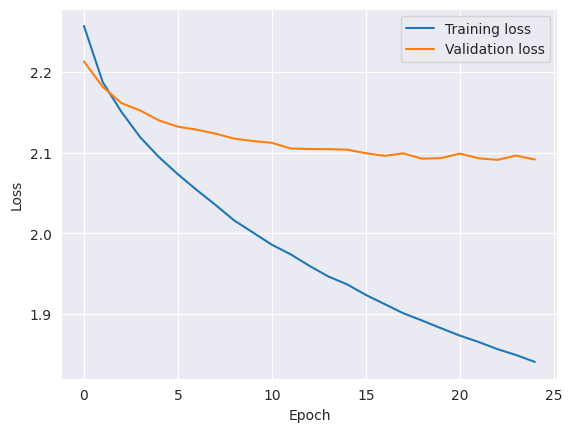

Finished Training


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
learning_rate = 0.01
num_epochs = 25
patience = 5
# class MLP için lazım olan inputlar: num_input_feats, num_hidden_neuron, num_classes

num_input_feats = images.size(1)*images.size(2)*images.size(3) # image'ın boyutu ve kaç channel olduğu

num_hidden_neuron = 5000
num_classes = len(classes)

model = MLP(num_input_feats, num_hidden_neuron, num_classes)

# Loss function ve optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

list_train_loss, list_val_loss = [], []

best_val_loss = None

patience_counter = 0
# Train the model
for epoch in range(num_epochs):

    # training loop
    train_loss = 0.0
    train_count = 0.0
    for inputs, labels in trainloader:

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_count += 1.0
        train_loss += loss.item()
        """train_count += labels.size(0) # bu comment outlu kısmı bir arkadaş eklemiş ama gereksiz extra iş yapıyor.
        train_loss += loss.item() * labels.size(0) # batch'leri hesaba katmıyor, herşeyi 4'le (batch sayısı) çarpıyor.
        # loss değeri zaten tüm batch için toplanmış sonuç. yani içinde 4 resmin loss'u var toplam. o yüzden 4'le çarpmaya gerek yok.MLP
        # aynı şekilde count'a da 4 eklemeye gerek yok. batch sayısı ve batch loss'u üzerinde çalışmak bize yeter.
        # o yüzden train_count and train_loss kısmını eski haline getirdim"""

    # Şuraya validation setinden genelleme sonucu alalım - her epoch için
    # validation loop Author : Ömer Macit TÜRK
    val_loss = 0.0
    """val_correct = 0.0
    val_total = 0.0"""
    #validation_count = 0.0
    with torch.no_grad():
        model.eval()
        for inputs, labels in valloader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            #validation_count += 1.0
            val_loss += loss.item()
            """_, predicted = torch.max(outputs, 1) # burada validation accuracy hesabı var.
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()"""

    model.train()

    # calculate metrics
    train_loss /= train_count
    val_loss /= len(valloader)
    #val_acc = 100 * val_correct / val_total

    print("Epoch", epoch, "Training loss", train_loss,"Validation Loss :",val_loss)

    list_train_loss.append(train_loss)
    list_val_loss.append(val_loss)

    val_score = val_loss
    if best_val_loss is None:
        best_val_loss = val_score # hafızada patience boyu tutmaya başla
        torch.save(model.state_dict(), "checkpoint.pt")
    elif best_val_loss < val_score: # patience counter
        patience_counter += 1
        print("Earlystopping Patience Counter:",patience_counter)
        if patience_counter == patience:
            break
    else:
        best_val_loss = val_score
        torch.save(model.state_dict(), "checkpoint.pt") # to keep the best model
        patience_counter = 0
    


# Ödev : tüm aşağıdaki işleri seaborn ile minimum sayıda satırla yapan alternatif kodu yazın (2 satır toplam)
# plot the results
sns.set_style("darkgrid")
plt.plot(list_train_loss, label="Training loss")
plt.plot(list_val_loss, label="Validation loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


print('Finished Training')

Ödev (gönüllü): 

1. Bunun altına bir cell açın, commentle author olarak adınızı soyadınızı ekleyin

undefined. torch.save ile save edilmiş en iyi modeli load edin,

undefined. test seti üzerinde bu en iyi modelden sonuç alın: accuracy ve F1 skoru olarak. Bu iki sonucu da print edin cell'in sonunda

Derse katılan öğrenci sayısı kadar cell/sonuç bekliyorum. Hafyata herkesin sonuçlarını karşılaştırırız, bakalım herkes doğru/aynı sonucu mu alacak

In [ ]:
# Author: Ömer Faruk Dilbaz
#!pip install torcheval
from torcheval.metrics.functional import multiclass_f1_score
from torcheval.metrics.functional import multiclass_accuracy

# Task 2
model = MLP(num_input_feats,num_hidden_neuron,num_classes)
model.load_state_dict(torch.load('checkpoint.pt'))

# Task 3 
## f1 score
predictions = []
ground_truths = []

model.eval()
with torch.no_grad():
    for inputs,masks in testloader:
        outputs = model(inputs)
        _,predicted = torch.max(outputs.data,1)
        predictions.extend(predicted.tolist())
        ground_truths.extend(masks.tolist())

# list to tensor
ground_truths = torch.tensor(ground_truths)
predictions = torch.tensor(predictions)

# calculate f1 score
f1_score = multiclass_f1_score(predictions,ground_truths,num_classes=10,average='macro')

# calculate accuracy
accuracy = multiclass_accuracy(predictions,ground_truths)

print("F1-Score: {:.4f}\nAccuracy: {:.4f}".format(f1_score,accuracy))


F1-Score: 0.3033
Accuracy: 0.3100


In [ ]:
"""
#2-3. adım icin chatgptnin yazdigi kod 
#(bu tarz disinda baska bir sonuc alamadim maalesef bizim yazdigimiza yakin degil gibi )
#AUTHOR: ChatGpt- İlkay Biçici 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score
# Load the saved model state dictionary
model.load_state_dict(torch.load("checkpoint.pt"))

# Set the model to evaluation mode
model.eval()

# Train model
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Predict on test set
y_pred = clf.predict(X_test)

# Evaluate on test set
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("F1 score:", f1)
"""

'\n#2-3. adım icin chatgptnin yazdigi kod \n#(bu tarz disinda baska bir sonuc alamadim maalesef bizim yazdigimiza yakin degil gibi )\n#AUTHOR: ChatGpt- İlkay Biçici \nfrom sklearn.feature_extraction.text import CountVectorizer\nfrom sklearn.naive_bayes import MultinomialNB\nfrom sklearn.metrics import accuracy_score, f1_score\n# Load the saved model state dictionary\nmodel.load_state_dict(torch.load("checkpoint.pt"))\n\n# Set the model to evaluation mode\nmodel.eval()\n\n# Train model\nclf = MultinomialNB()\nclf.fit(X_train, y_train)\n\n# Predict on test set\ny_pred = clf.predict(X_test)\n\n# Evaluate on test set\naccuracy = accuracy_score(y_test, y_pred)\nf1 = f1_score(y_test, y_pred, average=\'weighted\')\n\nprint("Accuracy:", accuracy)\nprint("F1 score:", f1)\n'

In [10]:
# Author: Ömer Macit TÜRK
model = MLP(num_input_feats,num_hidden_neuron,num_classes)
model.load_state_dict(torch.load('checkpoint.pt'))
model.eval()
predicts =[]
real_labels = list()
with torch.no_grad():
    for inputs,label in testloader:
        outputs = model(inputs)
        _,predict = torch.max(outputs.data,1)
        predicts.extend(predict.tolist())
        real_labels.extend(label.tolist())


from sklearn.metrics import f1_score,accuracy_score,classification_report
print("Accuracy score of this model: {}".format(accuracy_score(real_labels,predicts)))
print(classification_report(real_labels,predicts))

Accuracy score of this model: 0.31
              precision    recall  f1-score   support

           0       0.40      0.33      0.36      1000
           1       0.34      0.39      0.36      1000
           2       0.22      0.21      0.22      1000
           3       0.26      0.12      0.17      1000
           4       0.26      0.32      0.28      1000
           5       0.33      0.19      0.24      1000
           6       0.29      0.37      0.33      1000
           7       0.31      0.36      0.33      1000
           8       0.35      0.44      0.39      1000
           9       0.34      0.37      0.35      1000

    accuracy                           0.31     10000
   macro avg       0.31      0.31      0.30     10000
weighted avg       0.31      0.31      0.30     10000



<AxesSubplot: >

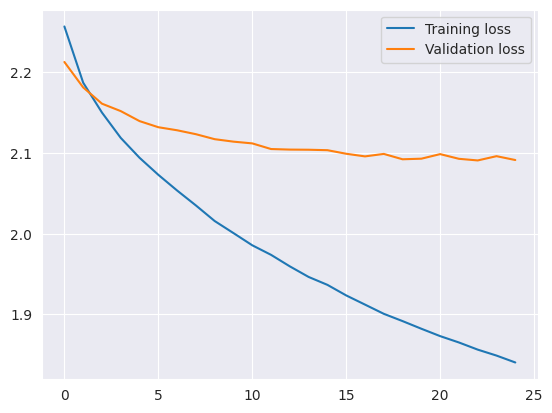

In [ ]:
#chatgpt
sns.lineplot(x=range(num_epochs), y=list_train_loss, label="Training loss")
sns.lineplot(x=range(num_epochs), y=list_val_loss, label="Validation loss")


In [ ]:
"""# Veri setini oluştur
X, y = make_classification(n_samples=1000, n_classes=3, n_features=10, n_informative=5, n_redundant=0, random_state=42)

# Veri setini eğitim ve test kümelerine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeli oluştur
model = keras.models.Sequential([
    keras.layers.Dense(10, input_shape=(10,), activation="tanh"),
    keras.layers.Dense(3, activation="softmax")
])

# Modeli derle
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Modeli eğit
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)

# Test verileri üzerinde modeli değerlendir
test_loss, test_acc = model.evaluate(X_test, y_test)

print("Test accuracy:", test_acc)


"""

'# Veri setini oluştur\nX, y = make_classification(n_samples=1000, n_classes=3, n_features=10, n_informative=5, n_redundant=0, random_state=42)\n\n# Veri setini eğitim ve test kümelerine ayır\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n\n# Modeli oluştur\nmodel = keras.models.Sequential([\n    keras.layers.Dense(10, input_shape=(10,), activation="tanh"),\n    keras.layers.Dense(3, activation="softmax")\n])\n\n# Modeli derle\nmodel.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])\n\n# Modeli eğit\nhistory = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)\n\n# Test verileri üzerinde modeli değerlendir\ntest_loss, test_acc = model.evaluate(X_test, y_test)\n\nprint("Test accuracy:", test_acc)\n\n\n'

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=700e962d-3fcf-4c82-8c8d-f1f2cc26fdf7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>